# Imports to the libraries used are made in the cell below

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data.csv file into a pandas dataframe

In [13]:
data = pandas.read_csv("data.csv")
data.head()

ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1            7.4              0.70         0.00             1.9   
1   2            7.8              0.88         0.00             2.6   
2   3            7.8              0.76         0.04             2.3   
3   4           11.2              0.28         0.56             1.9   
4   5            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970   NaN   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4      5.0  
1       0.68      9.8      5.0  
2       0.65      9.8      5.0  
3       0.58      9.8      6.0  
4       0.56      9.4      5.0

# Getting the number of colums and rows in the dataframe

In [3]:
print(data.shape)
# num_rows = data.shape[0] or len(data)
# num_cols = df.shape[1]

(1601, 13)


# Dropping the duplicates in the data

In [4]:
data = data.drop_duplicates()

# Printing the length of the data after the duplicates were dropped

In [5]:
print(data.shape[0])

1601


The result shows that there were no duplicates since the lengths were the same before and after the duplicates were dropped

# Count the number of null values in the data

In [6]:
num_nulls = data.isnull().sum()
print(num_nulls.sum())

10


There are 10 null values in the data.
This null values can either be dropped using the data.dropna()
or it can be filled with values such as the mean of the data set using the data..fillna() method

I chose to drop the null values since the number of null values is small compared to the ntire dataset

# Dropping the null values

In [7]:
data = data.dropna()
print(data.shape[0])

1591


Therefore the number of rows left is 1591

# Statistical inferences from the data
This includes:
- the mean
- the maximum value
- the minimum value
- the quartiles
- the count

In [8]:
print(data.describe())

                ID  fixed acidity  volatile acidity  citric acid  \
count  1591.000000    1591.000000       1591.000000  1591.000000   
mean    801.060968       8.320616          0.527681     0.271477   
std     460.740942       1.740134          0.179045     0.194807   
min       1.000000       4.600000          0.120000     0.000000   
25%     402.500000       7.100000          0.390000     0.090000   
50%     801.000000       7.900000          0.520000     0.260000   
75%    1199.500000       9.200000          0.640000     0.420000   
max    1601.000000      15.900000          1.580000     1.000000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     1591.000000  1591.000000          1591.000000           1591.000000   
mean         2.540761     0.087500            15.861722             46.498429   
std          1.413076     0.047175            10.429385             32.998659   
min          0.900000     0.012000             1.000000        

# The correlation between the columns 
This will be done using the correlation matrix
The correlation matrix will be calculated for all the colums except the **ID** Column

In [9]:
data_without_id = data.drop('ID', axis=1)
corr_matrix = data_without_id.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256737     0.672306   
volatile acidity          -0.256737          1.000000    -0.551511   
citric acid                0.672306         -0.551511     1.000000   
residual sugar             0.114839          0.001336     0.143731   
chlorides                  0.093857          0.061202     0.204294   
free sulfur dioxide       -0.150261         -0.014598    -0.057619   
total sulfur dioxide      -0.110992          0.074132     0.038593   
density                    0.666876          0.022504     0.364181   
pH                        -0.683788          0.234251    -0.543230   
sulphates                  0.184937         -0.261872     0.313530   
alcohol                   -0.061167         -0.203490     0.109561   
quality                    0.124958         -0.389380     0.224263   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

# Finding the frequency count of each unique value in the columns of the data
The output will display the unique values in the column and the count of each unique value.

**This will be done for only some few columns** 

In [10]:
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']

for col in numerical_cols:
    (print(data[col].value_counts()))

7.2     68
7.1     57
7.5     52
7.8     51
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    46
0.500    45
0.430    43
0.590    39
0.360    38
         ..
1.115     1
1.185     1
0.565     1
1.025     1
0.950     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     67
0.24     51
0.02     50
0.26     39
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     155
2.20     130
1.80     128
2.10     127
1.90     118
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


# Creating a histogram for each of the columns

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes to make it easier to iterate over them
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    axs[i].hist(data[col], bins=10)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

# Remove any unused subplots
for i in range(len(numerical_cols), len(axs)):
    fig.delaxes(axs[i])

fig.suptitle("Histograms of Red Wine Characteristics")
plt.show()

<Axes: >

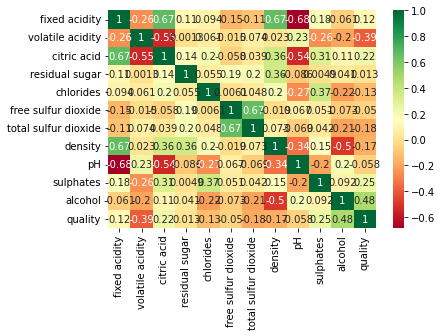

In [14]:
sns.heatmap(corr_matrix,cmap="RdYlGn",annot = True)